In [2]:
from scipy.stats import t
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
df = pd.read_csv('Final.csv')

In [4]:
df.head()

,Unnamed: 0,Player,season,NBA_Salary,Class,Pos,School,Conf,G,MP,...,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%,sal_as_%
0,0,A.J. Hammons,2016,650000,4,C,Purdue,Big Ten,33,813.0,...,14.969697,1.121212,8.181818,0.272727,1.969697,2.545455,0.545455,0.592262,0.601190,0.006904
1,1,A.J. Price,2009,62552,4,G,Connecticut,Big East,35,1112.0,...,14.714286,4.685714,3.485714,0.685714,2.685714,0.000000,0.401961,0.407674,0.505995,0.001084
2,2,Aaron Brooks,2007,972720,4,G,Oregon,Pac-10,35,1289.0,...,17.742857,4.257143,4.257143,1.371429,2.542857,0.171429,0.404040,0.460043,0.546436,0.017486
3,3,Aaron Gray,2007,427163,4,C,Pittsburgh,Big East,36,1016.0,...,13.861111,1.694444,9.472222,0.416667,1.527778,1.722222,0.000000,0.565097,0.565097,0.007679
4,4,Acie Law,2007,203057,4,G,Texas A&M,Big 12,34,1153.0,...,18.058824,4.970588,3.323529,1.147059,2.588235,0.029412,0.457831,0.500000,0.543981,0.003650


In [5]:
#querying for each position 
guards = df.query('Pos == "G"')
centers = df.query('Pos == "C"')
forwards = df.query('Pos == "F"')

Text(0.5, 1.0, 'Distribution of blocks for guards')

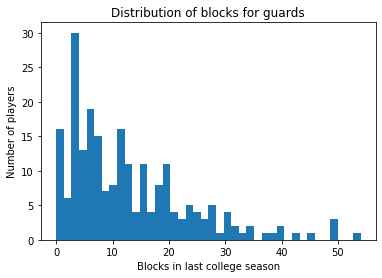

In [6]:
#Plotting the distribution of blocks
plt.hist('BLK', bins = 40, data = guards)
plt.xlabel('Blocks in last college season')
plt.ylabel('Number of players')
plt.title('Distribution of blocks for guards')

We see that the distribution of blocks for guards is skewed to the right.

I want to find the confidence interval, t-statistic and standard deviation for blocks to see how many blocks for guards are unusually large for the position.

In [7]:
#Calculating the mean blocks for guards
blk_mean = np.mean(guards['BLK'])
blk_mean

12.946188340807176

In [8]:
#Standard deviation of blocks for guards
blk_stdev = np.std(guards['BLK'])
blk_stdev

10.77893524948127

In [9]:
#Critical value for blocks
critical_value_blk = t.ppf(.05, 223)
critical_value_blk

-1.6517153201223576

In [11]:
#Finding the margin of error 
margin_of_error = (critical_value_blk * blk_stdev)/np.sqrt(223)
margin_of_error

-1.1922261094860749

In [12]:
#Confidence interval of blocks for guards
blk_ci = [blk_mean + margin_of_error, blk_mean - margin_of_error]
blk_ci

[11.7539622313211, 14.13841445029325]

In [13]:
#Using bootstrap statistics to verify the confidence interval
def draw_bs_reps(data, func, size):
    #Empty array
    bs_replicates = np.empty(size)
    
    #Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size = len(data)))
        
    return bs_replicates

In [14]:
#Bootstrap replicates of blocks
np.random.seed(40)
bs_reps_blk = draw_bs_reps(guards['BLK'], np.mean, 10000)
bs_reps_blk

array([14.46636771, 12.05381166, 13.53811659, ..., 13.05381166,
       13.1838565 , 12.64125561])

In [15]:
#Bootstrapped confidence interval
np.percentile(bs_reps_blk, [5, 95])

array([11.76233184, 14.13004484])

In [16]:
#Correlation coefficient and P-Value for blocks against Salary
st.pearsonr(guards['BLK'], guards['sal_as_%'])

(0.25190943857220666, 0.00014343529621214932)

Our bootstrap replicates resemble a confidence interval similar to our initial confidence interval

Text(0.5, 1.0, 'Distribution of Total rebounds for forwards')

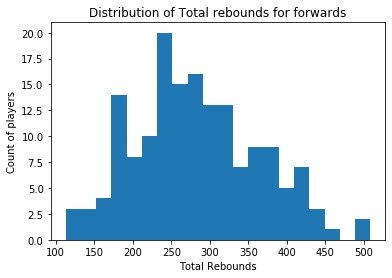

In [17]:
#Plotting the distribution rebounds for forwards
plt.hist('TRB', bins = 20, data = forwards)
plt.xlabel('Total Rebounds')
plt.ylabel('Count of players')
plt.title('Distribution of Total rebounds for forwards')

The distribution of total rebounds for forwards resembles a normal distribution.

In [18]:
trb_mean = np.mean(forwards['TRB'])
trb_mean

283.1666666666667

In [19]:
trb_stdev = np.std(forwards['TRB'])
trb_stdev

79.85157914129205

In [20]:
critical_value_trb = t.ppf(.05, 162)
critical_value_trb

-1.6543139565251872

In [21]:
margin_of_error_trb = (critical_value_trb * trb_stdev)/np.sqrt(162)
margin_of_error_trb

-10.378723344407575

In [22]:
trb_ci = [trb_mean + margin_of_error_trb, trb_mean - margin_of_error_trb]
trb_ci

[272.78794332225914, 293.54539001107423]

In [23]:
#Verifying the confidence interval for total rebounds
np.random.seed(40)
bs_reps_trb = draw_bs_reps(forwards['TRB'], np.mean, 10000)
bs_reps_trb

array([279.48148148, 292.96296296, 274.42592593, ..., 288.08641975,
       282.49382716, 281.63580247])

In [24]:
np.percentile(bs_reps_trb, [5,95])

array([272.93209877, 293.40185185])

In [25]:
st.pearsonr(guards['BLK'], guards['sal_as_%'])

(0.25190943857220666, 0.00014343529621214932)

(array([2., 1., 0., 0., 0., 1., 2., 1., 1., 2., 2., 1., 1., 0., 0., 2., 2.,
        0., 0., 0., 2., 1., 0., 1., 0., 1., 1., 0., 1., 1.]),
 array([168. , 171.7, 175.4, 179.1, 182.8, 186.5, 190.2, 193.9, 197.6,
        201.3, 205. , 208.7, 212.4, 216.1, 219.8, 223.5, 227.2, 230.9,
        234.6, 238.3, 242. , 245.7, 249.4, 253.1, 256.8, 260.5, 264.2,
        267.9, 271.6, 275.3, 279. ]),
 <a list of 30 Patch objects>)

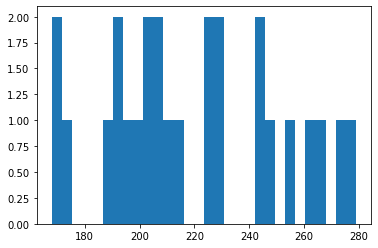

In [26]:
#Finding the centers' point distribution
plt.hist('FG', bins = 30, data = centers)

We have a very small sample size for centers (n = 26) which is why our distribution looks the way it does. Because of this, we will not include centers from now on.

In [27]:
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = st.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = st.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [57]:
def pearsonr_ci_t(x,y,alpha):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = st.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = st.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [59]:
# Calculating confidence interval for blocks by position
pearsonr_ci(guards['BLK'], guards['sal_as_%'])

(0.25190943857220666,
 0.00014343529621214932,
 0.12465804061599098,
 0.371007864886548)

In [30]:
pearsonr_ci(forwards['BLK'], forwards['sal_as_%'])

(0.20489486556546788,
 0.008909672620042474,
 0.05235345657631831,
 0.34809273013116)

In [32]:
BLK_array = [.371-.125, .348-.052, .349 + .425]
BLK_array

[0.246, 0.296, 0.774]

In [33]:
#Calculating confidence interval for steals by position
pearsonr_ci(guards['STL'], guards['sal_as_%'])

(0.2021775893716762,
 0.0024167255382192376,
 0.0727325041721772,
 0.3249240930544266)

In [34]:
pearsonr_ci(forwards['STL'], forwards['sal_as_%'])

(0.163209721744561,
 0.03797076928123088,
 0.009246976349964285,
 0.30961338671240796)

In [36]:
STL_Array = [.325-.073, .310-.009, .521+.235]
STL_Array

[0.252, 0.301, 0.756]

In [37]:
#Calculating confidence interval for free throw attempts by position
pearsonr_ci(guards['FTA'], guards['sal_as_%'])

(0.15640094173770894,
 0.01944762342661438,
 0.025548940051494964,
 0.28198385181159713)

In [38]:
pearsonr_ci(forwards['FTA'], forwards['sal_as_%'])

(0.21615504946800057,
 0.005733627871466944,
 0.06409591789475674,
 0.35840482782687166)

In [40]:
FTA_Array = [.282 - .025, .358-.064, .538+.213]
FTA_Array

[0.25699999999999995, 0.294, 0.751]

In [41]:
#Calcluating confidence interval for defensive rebounds by position
pearsonr_ci(guards['DRB'], guards['sal_as_%'])

(0.17756400657510085,
 0.007864132226384574,
 0.04729021620533548,
 0.3018983441565977)

In [42]:
pearsonr_ci(forwards['DRB'], forwards['sal_as_%'])

(0.2346895003640908,
 0.0026464024330590916,
 0.08351633752428485,
 0.37530345504185036)

In [44]:
DRB_Array = [.301- .0473, .375-.084, .519 + .238]
DRB_Array

[0.2537, 0.291, 0.757]

In [87]:
#Pulling guards and forwards data to conduct t-test
#t-test for free throw attempts
st.ttest_ind(guards['FTA'], forwards['FTA'], equal_var = False)

Ttest_indResult(statistic=-2.206268874879565, pvalue=0.028063995609427395)

In [86]:
#t-test for steals
st.ttest_ind(guards['STL'], forwards['STL'], equal_var = False)

Ttest_indResult(statistic=7.768129615949506, pvalue=8.092043477493745e-14)

Looking for the median of the relevant stats for forwards and guards.

In [88]:
#Median and max of blocks for guards
print(np.median(guards['BLK']), np.max(guards['BLK']))

10.0 54


In [89]:
#Median and max of blocks for forwards
print(np.median(forwards['BLK']), np.max(forwards['BLK']))

34.5 186


In [75]:
#Median and max of steals for guards
print(np.median(guards['STL']),np.percentile(guards['STL'],[25,75]))

49.0 [38. 63.]


In [76]:
#Median and max of steals for forwards
print(np.median(forwards['STL']),np.percentile(forwards['STL'],[25,75]))

35.0 [25. 47.]


In [79]:
#Median and max of free throw attempts for guards
print(np.median(guards['FTA']), np.max(guards['FTA']))

176.0 315


In [80]:
#Median and max of free throw attempts for forwards
print(np.median(forwards['FTA']), np.max(forwards['FTA']))

191.0 336


In [82]:
#Median and max of defensive rebounds for forwards
print(np.median(guards['DRB']), np.percentile(forwards['DRB'], 25))

117.0 155.25


In [85]:
#Median and max of defensive rebounds for guards
print((np.percentile(guards['PTS'],[25,75])), (np.percentile(forwards['PTS'], [25,75])))

[556.  677.5] [530.5 647. ]


In [7]:
print(len(guards))

223


In [8]:
print(len(centers) + len(forwards))

188
